In [59]:
from ValueIteration import value_iteration
import matplotlib.pyplot as plt
import numpy as np
import math

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with no lead times

In [60]:

def create_P(demand_distribution):
    def prob_trans(s, a, sp):
        demand = s + a - sp
        return demand_distribution.get(demand, 0)

    return prob_trans

def create_R(demand_distribution, hold_cost, backlog_cost, order_cost):
    def cost_function(s, a):
        holding_cost = hold_cost*(sum(max(s + a - dt, 0)*prob for dt, prob in demand_distribution.items()))
        backlogged_cost = backlog_cost*(sum(max(dt - s - a, 0)*prob for dt, prob in demand_distribution.items()))
        ordering_cost = order_cost*a

        return holding_cost + backlogged_cost + ordering_cost
    
    return cost_function


def value_update_func(capacity):
    def bellman_eq_no_lead(s, S, A, P, R, gamma, Vk):
        values = dict((a, 0) for a in A if s+a <= capacity) # value function at s for each action
        # print(s, values.keys())
        for a in values.keys():
            values[a] = R(s, a) + gamma*sum([P(s, a, sp)*Vk[sp] for sp in S])
        # print(values)
        return values
    return bellman_eq_no_lead




In [61]:

capacity = 100
S = set(range(-capacity, capacity+1))        # inventory levels
A = set(range(math.ceil(capacity/2)+1))      # order quantities (all integers)
# A = set(int(x) for x in np.linspace(0, math.ceil(capacity/2), 11))   # (multiples of 5)
demand_dist = {0: 0.2, 10: 0.6, 20: 0.2}     # demand distribution
ch = 1                                       # holding costs
cb = 100                                     # backlog costs (underage)
cs = 0                                       # ordering/shipping costs
P = create_P(demand_dist)
R = create_R(demand_dist, ch, cb, cs)
V_init = dict([(s, 0) for s in S])    # initial probability of winning at all states is 0
gamma=0.999
bellman_eq_no_lead = value_update_func(capacity)

results_1 = value_iteration(S=S, A=A, P=P, R=R, gamma=0.99, max_iterations=1000, 
                          bellman_eq=bellman_eq_no_lead, V_init=V_init, theta=1e-7)



In [62]:
optimal_policy = results_1["optimal_policy"]
cost_function = results_1["value_function"]



In [63]:
cost_function

{0: 999.9568287525892,
 1: 999.9568287525892,
 2: 999.9568287525892,
 3: 999.9568287525892,
 4: 999.9568287525892,
 5: 999.9568287525892,
 6: 999.9568287525892,
 7: 999.9568287525892,
 8: 999.9568287525892,
 9: 999.9568287525892,
 10: 999.9568287525892,
 11: 999.9568287525892,
 12: 999.9568287525892,
 13: 999.9568287525892,
 14: 999.9568287525892,
 15: 999.9568287525892,
 16: 999.9568287525892,
 17: 999.9568287525892,
 18: 999.9568287525892,
 19: 999.9568287525892,
 20: 999.9568287525892,
 21: 1001.2037115456067,
 22: 1002.4505943386241,
 23: 1003.6974771316416,
 24: 1004.9443599246591,
 25: 1006.1912427176765,
 26: 1007.4381255106939,
 27: 1008.6850083037114,
 28: 1009.9318910967288,
 29: 1011.1787738897464,
 30: 1012.4256566827637,
 31: 1014.596041195298,
 32: 1016.7664257078321,
 33: 1018.9368102203662,
 34: 1021.1071947329004,
 35: 1023.2775792454345,
 36: 1025.4479637579686,
 37: 1027.6183482705026,
 38: 1029.788732783037,
 39: 1031.959117295571,
 40: 1034.129501808105,
 41: 1037.

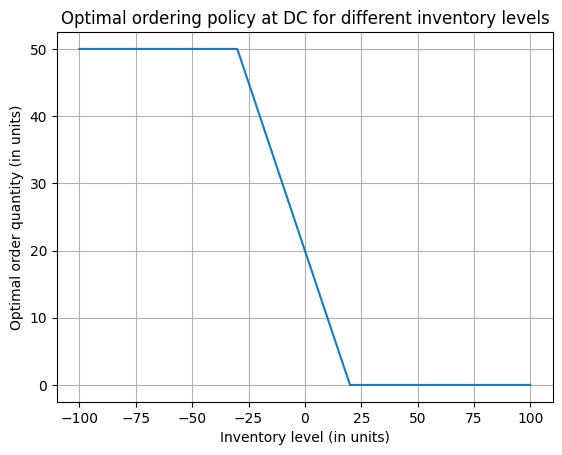

In [64]:
plt.plot(*zip(*sorted(optimal_policy.items())))
plt.title("Optimal ordering policy at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Optimal order quantity (in units)")
plt.grid()
plt.show()


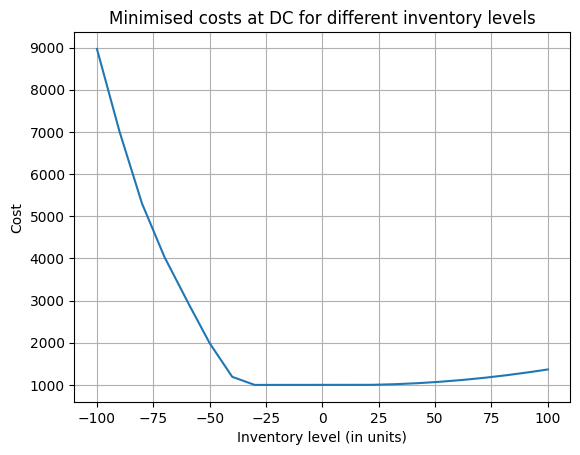

In [65]:
plt.plot(*zip(*sorted(cost_function.items())))
plt.title("Minimised costs at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Cost")
plt.grid()
plt.show()

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with lead times